In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude adn longitude combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Import from Citipy dependency.
from citipy import citipy

In [4]:
# Add the latitudes and longitudes to a list. 
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities. 
cities = []

# Identify the nearest city for each latitude and longitude combination. 
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list. 
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count. 
len(cities)

630

In [6]:
# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call. 
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [9]:
# Import the requests Library. 
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Create an empty list to hold the weather data. 
city_data = []

#Print the beginning of the logging. 
print ('Beginning Data Retrieval     ')
print ('-----------------------------')

# Create Counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep (60)
        
    #Create Endpoint url with each city. 
    city_url = url + '&q=' + city.replace (' ', '+')
    
    # Log the URL, record, and set numbers and the city. 
    print (f'Processing Record {record_count} of Set {set_count} | {city}')
    # Add 1 to the record count. 
    record_count += 1
    
    # Run an API request for each of the cities. 
    try: 
    
        # Parse the JSON and retrieve the data. 
        city_weather = requests.get (city_url).json()

        # Parse out the needed data. 
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']

        # Convert the date to ISO standard. 
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list. 
        city_data.append({'City' : city.title(),
                          'Lat' : city_lat,
                          'Lng' : city_lng,
                          'Max Temp' : city_max_temp,
                          'Humidity' : city_humidity,
                          'Cloudiness' : city_clouds,
                          'Wind Speed' : city_wind,
                          'Country' : city_country,
                          'Date': city_date})
        
# If an error is experienced, skip the city. 
    except:
        print ('City not found. Skipping...')
        pass

# Indicate the data loading is complete.
print ('-----------------------------')
print ('Data Retrieval Complete      ')
print ('-----------------------------')

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cabo san lucas
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | loandjili
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | sawakin
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | kalabo
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | saint-francois
Processing Record 16 of Set 1 | pangoa
Processing Record 17 of Set 1 | walvis bay
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | esperance
Processing Record 22 of Set 1 | b

Processing Record 35 of Set 4 | kununurra
Processing Record 36 of Set 4 | puerto ayora
Processing Record 37 of Set 4 | kankakee
Processing Record 38 of Set 4 | pemangkat
Processing Record 39 of Set 4 | maha sarakham
Processing Record 40 of Set 4 | adet
Processing Record 41 of Set 4 | iracoubo
Processing Record 42 of Set 4 | hecun
Processing Record 43 of Set 4 | general pico
Processing Record 44 of Set 4 | bengkulu
Processing Record 45 of Set 4 | sonoita
Processing Record 46 of Set 4 | tessalit
Processing Record 47 of Set 4 | narsaq
Processing Record 48 of Set 4 | tikamgarh
Processing Record 49 of Set 4 | chuncheng
Processing Record 50 of Set 4 | broome
Processing Record 1 of Set 5 | sangar
Processing Record 2 of Set 5 | tucupita
Processing Record 3 of Set 5 | sechura
Processing Record 4 of Set 5 | christchurch
Processing Record 5 of Set 5 | isangel
Processing Record 6 of Set 5 | kulhudhuffushi
Processing Record 7 of Set 5 | arrecife
Processing Record 8 of Set 5 | norman wells
Processin

Processing Record 23 of Set 8 | effium
Processing Record 24 of Set 8 | russell
Processing Record 25 of Set 8 | hualmay
Processing Record 26 of Set 8 | hobyo
Processing Record 27 of Set 8 | turinsk
Processing Record 28 of Set 8 | locri
Processing Record 29 of Set 8 | cacador
Processing Record 30 of Set 8 | roald
Processing Record 31 of Set 8 | bokoro
Processing Record 32 of Set 8 | ulaanbaatar
Processing Record 33 of Set 8 | nehe
Processing Record 34 of Set 8 | owando
Processing Record 35 of Set 8 | bunia
Processing Record 36 of Set 8 | taltal
Processing Record 37 of Set 8 | siirt
Processing Record 38 of Set 8 | gladstone
Processing Record 39 of Set 8 | yarim
Processing Record 40 of Set 8 | teloloapan
Processing Record 41 of Set 8 | gulshat
City not found. Skipping...
Processing Record 42 of Set 8 | san juan
Processing Record 43 of Set 8 | sassandra
Processing Record 44 of Set 8 | bullhead city
Processing Record 45 of Set 8 | itoman
Processing Record 46 of Set 8 | kadhan
Processing Reco

Processing Record 16 of Set 12 | moses lake
Processing Record 17 of Set 12 | ohara
Processing Record 18 of Set 12 | mabaruma
Processing Record 19 of Set 12 | buraydah
Processing Record 20 of Set 12 | sao filipe
Processing Record 21 of Set 12 | cumaribo
City not found. Skipping...
Processing Record 22 of Set 12 | karonga
Processing Record 23 of Set 12 | turochak
Processing Record 24 of Set 12 | maniitsoq
Processing Record 25 of Set 12 | lorengau
Processing Record 26 of Set 12 | hofn
Processing Record 27 of Set 12 | hambantota
Processing Record 28 of Set 12 | haines junction
Processing Record 29 of Set 12 | arman
Processing Record 30 of Set 12 | nabire
Processing Record 31 of Set 12 | viedma
Processing Record 32 of Set 12 | machico
Processing Record 33 of Set 12 | vila
Processing Record 34 of Set 12 | nhulunbuy
Processing Record 35 of Set 12 | karasburg
Processing Record 36 of Set 12 | dwarka
Processing Record 37 of Set 12 | kushima
Processing Record 38 of Set 12 | wagar
Processing Recor

In [11]:
# Convert the Array of dictionarie to a Pandas DataFrame. 
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cabo San Lucas,22.8909,-109.9124,87.51,57,0,6.91,MX,2022-10-13 00:28:27
1,Mar Del Plata,-38.0023,-57.5575,57.09,69,0,1.99,AR,2022-10-13 00:25:49
2,Ushuaia,-54.8000,-68.3000,33.46,93,75,26.46,AR,2022-10-13 00:28:27
3,Loandjili,-4.7561,11.8578,77.11,88,75,8.05,CG,2022-10-13 00:28:28
4,Longyearbyen,78.2186,15.6401,35.44,69,40,9.22,SJ,2022-10-13 00:28:28
5,Busselton,-33.6500,115.3333,52.84,66,11,3.22,AU,2022-10-13 00:28:28
6,Ribeira Grande,38.5167,-28.7000,72.77,78,14,8.01,PT,2022-10-13 00:28:29
7,Sawakin,19.1059,37.3321,81.57,75,1,6.40,SD,2022-10-13 00:28:29
8,Lebu,-37.6167,-73.6500,49.24,83,35,14.79,CL,2022-10-13 00:28:29
9,Kaitangata,-46.2817,169.8464,54.23,52,80,6.89,NZ,2022-10-13 00:28:30


In [12]:
# Reorder the columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp','Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cabo San Lucas,MX,2022-10-13 00:28:27,22.8909,-109.9124,87.51,57,0,6.91
1,Mar Del Plata,AR,2022-10-13 00:25:49,-38.0023,-57.5575,57.09,69,0,1.99
2,Ushuaia,AR,2022-10-13 00:28:27,-54.8000,-68.3000,33.46,93,75,26.46
3,Loandjili,CG,2022-10-13 00:28:28,-4.7561,11.8578,77.11,88,75,8.05
4,Longyearbyen,SJ,2022-10-13 00:28:28,78.2186,15.6401,35.44,69,40,9.22
5,Busselton,AU,2022-10-13 00:28:28,-33.6500,115.3333,52.84,66,11,3.22
6,Ribeira Grande,PT,2022-10-13 00:28:29,38.5167,-28.7000,72.77,78,14,8.01
7,Sawakin,SD,2022-10-13 00:28:29,19.1059,37.3321,81.57,75,1,6.40
8,Lebu,CL,2022-10-13 00:28:29,-37.6167,-73.6500,49.24,83,35,14.79
9,Kaitangata,NZ,2022-10-13 00:28:30,-46.2817,169.8464,54.23,52,80,6.89


In [13]:
# Create the output file (CSV)
output_data_file = 'weather_data/cities.csv'
# Export the City_Data into a CSV. 
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting. 

lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

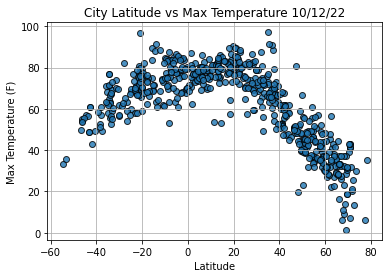

In [15]:
# Import time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
            max_temps,
            edgecolor = 'black', linewidths = 1, marker = 'o',
            alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs Max Temperature ' + time.strftime("%x"))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure. 
plt.savefig('weather_data/Fig1.png')

# Show plot.
plt.show()

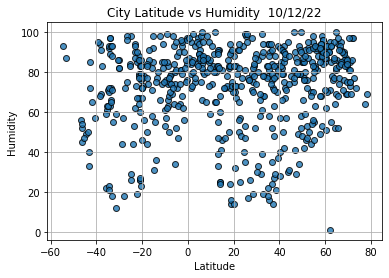

In [16]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, 
            humidity,
            edgecolor = 'black', linewidths = 1, marker = 'o',
            alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs Humidity  ' + time.strftime("%x"))
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure. 
plt.savefig('weather_data/Fig2.png')

# Show plot.
plt.show()

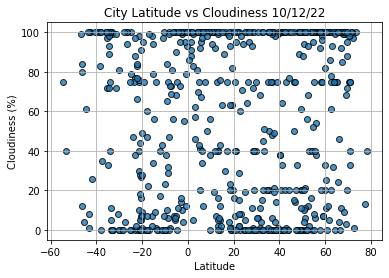

In [17]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, 
            cloudiness,
            edgecolor = 'black', linewidths = 1, marker = 'o',
            alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs Cloudiness ' + time.strftime("%x"))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure. 
plt.savefig('weather_data/Fig3.png')

# Show plot.
plt.show()

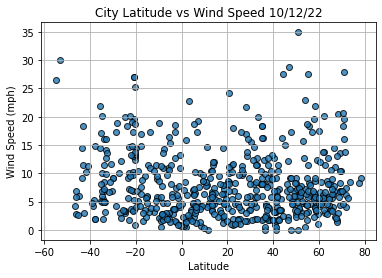

In [18]:
# Build the scatter plot for latitude vs. windspeed.
plt.scatter(lats, 
            wind_speed,
            edgecolor = 'black', linewidths = 1, marker = 'o',
            alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs Wind Speed ' + time.strftime("%x"))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure. 
plt.savefig('weather_data/Fig4.png')

# Show plot.
plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames. 
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] <= 0)]

In [20]:
# Import Linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data. 
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Perform linear regression. 
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line 'y-values' from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line. 
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)

    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    
       # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

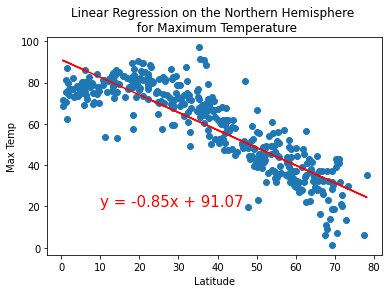

In [21]:
# Linear Regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df['Max Temp']

# Call the Function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (10,20))


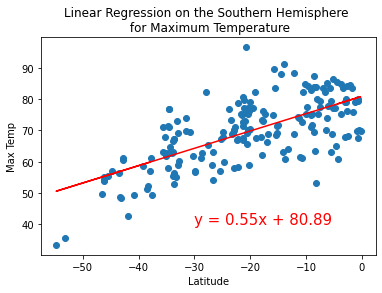

In [22]:
# Linear Regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df['Max Temp']

# Call the Function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-30,40))

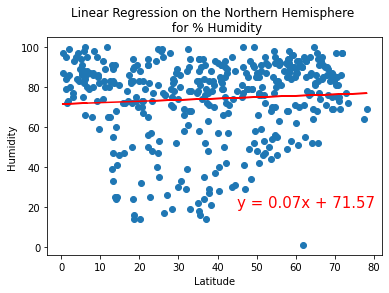

In [23]:
# Linear Regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df['Humidity']

# Call the Function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', 'Humidity', (45,20))


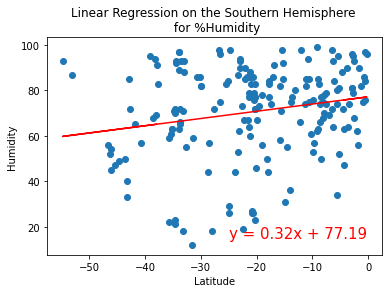

In [35]:
# Linear Regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df['Humidity']

# Call the Function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for %Humidity', 'Humidity', (-25,15))

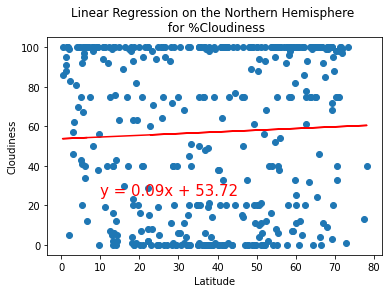

In [30]:
# Linear Regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df['Cloudiness']

# Call the Function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for %Cloudiness', 'Cloudiness', (10,25))


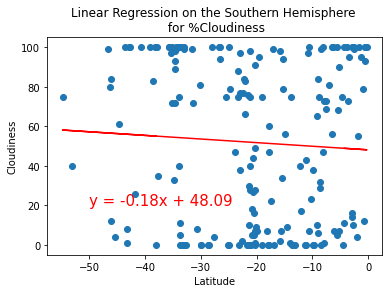

In [26]:
# Linear Regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df['Cloudiness']

# Call the Function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for %Cloudiness', 'Cloudiness', (-50,20))

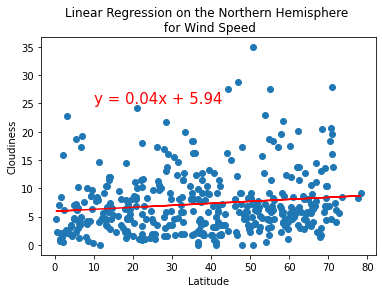

In [27]:
# Linear Regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df['Wind Speed']

# Call the Function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Cloudiness', (10,25))


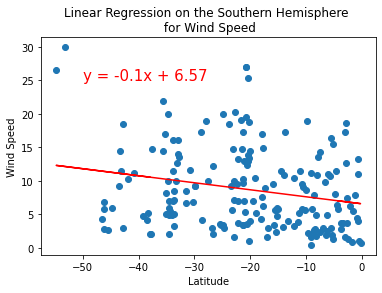

In [29]:
# Linear Regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df['Wind Speed']

# Call the Function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed', (-50,25))